### Final Project, Group 3
### Housing Sales for Washington State
#### George Garcia, Robert Schmid, and Ryan Dunn


#### 1. Data Importing and Pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
#import the data 
raw_df = pd.read_csv("house_sales.csv")

In [3]:
#view the top 5 elements of the dataframe 
raw_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# return basic summary statistics of the raw dataframe to see general structure 
raw_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,20479.000000,20545.000000,20503.000000,2.056900e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.372821,2.113507,2081.073697,1.517982e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930711,0.768913,915.043176,4.148617e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.500000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.070800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
# review the dataframe to identify the missing values
raw_df.isna().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
# Create a new df that adds a new column "sqft_calc" that corrects the sqft_living missing values and 
# then delete the sqft_living column
sqft_living_new = raw_df["sqft_above"] + raw_df["sqft_basement"]
raw_df = raw_df.assign(sqft_living_calc = sqft_living_new)

del raw_df["sqft_living"]

In [7]:
# clean the "date" column to only have year and month
raw_df['date']= raw_df['date'].str[:6]
# drop the id column from the dataframe
raw_df = raw_df.drop(columns =['id'])

In [8]:
raw_df.head()

,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_living_calc
0,201410,221900.0,3.0,1.00,5650.0,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1180
1,201412,538000.0,3.0,2.25,7242.0,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2570
2,201502,180000.0,2.0,1.00,10000.0,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,770
3,201412,604000.0,4.0,3.00,5000.0,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1960
4,201502,510000.0,3.0,2.00,8080.0,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1680


In [9]:
# Fill the missing values within the dataframe
housing_data = raw_df.interpolate(method='from_derivatives')

In [10]:
# review the dataframe to ensure no NA values exist in the dataframe
housing_data.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
sqft_living_calc    0
dtype: int64

In [11]:
# return basic summary statistics of the cleaned dataframe to see general structure 
housing_data.describe()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_living_calc
count,2.161300e+04,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372623,2.113606,1.511282e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2079.899736
std,3.671272e+05,0.917695,0.759783,4.078510e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,918.440897
min,7.500000e+04,0.000000,0.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,290.000000
25%,3.219500e+05,3.000000,1.750000,5.093000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,1427.000000
50%,4.500000e+05,3.000000,2.250000,7.638500e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,1910.000000
75%,6.450000e+05,4.000000,2.500000,1.075200e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2550.000000
max,7.700000e+06,33.000000,8.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,13540.000000


#### 2. Data Analysis and Visualization

Text(0.5, 1.0, 'Waterfront and Price Boxplot')

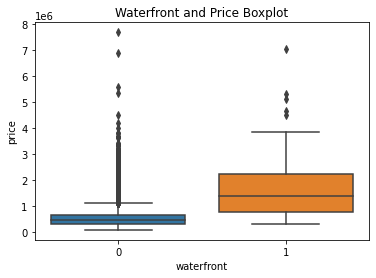

In [12]:
sns.boxplot(x=housing_data.waterfront, y = housing_data.price, data = housing_data)
plt.title('Waterfront and Price Boxplot')

Text(0.5, 1.0, 'Floors and Price Boxplot')

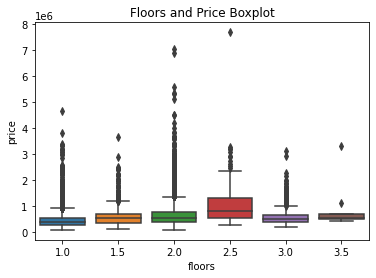

In [13]:
sns.boxplot(x=housing_data.floors, y = housing_data.price, data = housing_data)
plt.title('Floors and Price Boxplot')

Text(0.5, 1.0, 'View and Price Boxplot')

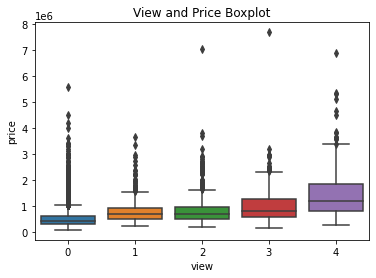

In [14]:
sns.boxplot(x=housing_data.view, y = housing_data.price, data = housing_data)
plt.title('View and Price Boxplot')

Text(0.5, 1.0, 'Year Renovated and Price Boxplot')

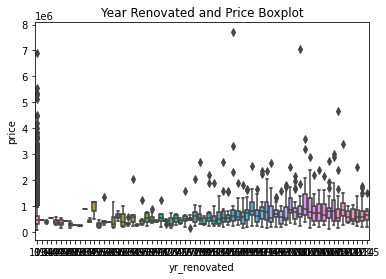

In [15]:
sns.boxplot(x=housing_data.yr_renovated, y = housing_data.price, data = housing_data)
plt.title('Year Renovated and Price Boxplot')

Text(0.5, 1.0, 'Grade and Price Boxplot')

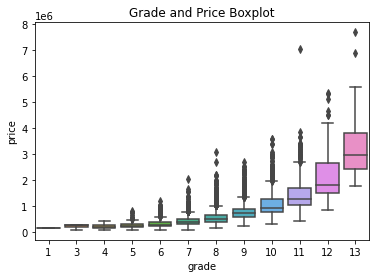

In [16]:
sns.boxplot(x=housing_data.grade, y = housing_data.price, data = housing_data)
plt.title('Grade and Price Boxplot')

In [17]:
# Splitting categorical and numerical data into 2 dataframes
df_categorical = housing_data[['date', 'view', 'condition', 'waterfront', 'yr_built', 'yr_renovated', 'zipcode']].copy()
df_numerical = housing_data[['price', 'bedrooms', 'sqft_living_calc', 'floors', 'sqft_lot', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15']].copy()

In [18]:
df_categorical.yr_built.describe()

count    21613.000000
mean      1971.005136
std         29.373411
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [19]:
# Year Built is widely varied 
# houses built from 1900-2015
# bin every 25 years
bins = [1900, 1925, 1950, 1975, 2000, 2015]
bins_yr_built = pd.cut(df_categorical['yr_built'], bins, include_lowest=True, labels = ('1900-1925', '1926-1950', '1951-1975', '1976-2000', '2001-2015'))
bins_yr_built = bins_yr_built.cat.as_unordered()

Text(0.5, 1.0, 'Count of Houses in 25 Year Groups')

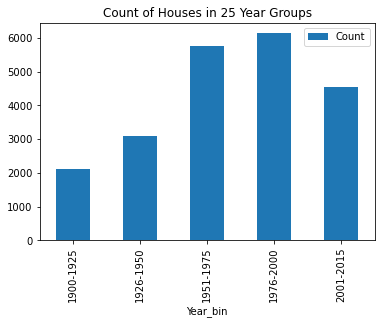

In [20]:
# Looking at the data after binning
df_plot_me = pd.DataFrame({'Year_bin': bins_yr_built.values, 'Count':1})
df_plot_me.groupby('Year_bin').sum().plot(kind='bar')
plt.title("Count of Houses in 25 Year Groups")

In [21]:
# based on results bin as
# renovated or not renovated
bins = [0, 1, 2015]
bins_yr_renovated = pd.cut(df_categorical['yr_renovated'], bins, include_lowest=True, labels=['not_renovated', 'renovated'])
bins_yr_renovated = bins_yr_renovated.cat.as_unordered()

Text(0.5, 1.0, 'Not Renovated versus Renovated Counts')

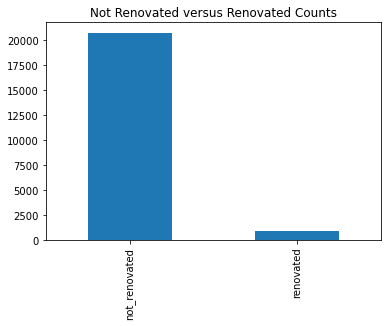

In [22]:
bins_yr_renovated.value_counts().plot(kind='bar')
plt.title("Not Renovated versus Renovated Counts")

In [23]:
# Normalize the dataframe to create a boxplot to better identify the extreme outliers
x = housing_data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_df = pd.DataFrame(x_scaled)
normalized_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.05,0.019266,0.090909,0.12500,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742,0.067170
1,0.07,0.060721,0.090909,0.28125,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027,0.172075
2,0.97,0.013770,0.060606,0.12500,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513,0.036226
3,0.07,0.069377,0.121212,0.37500,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996,0.126038
4,0.97,0.057049,0.090909,0.25000,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871,0.104906


Text(0.5, 1.0, 'Normalzied Boxplot of all DataPoints')

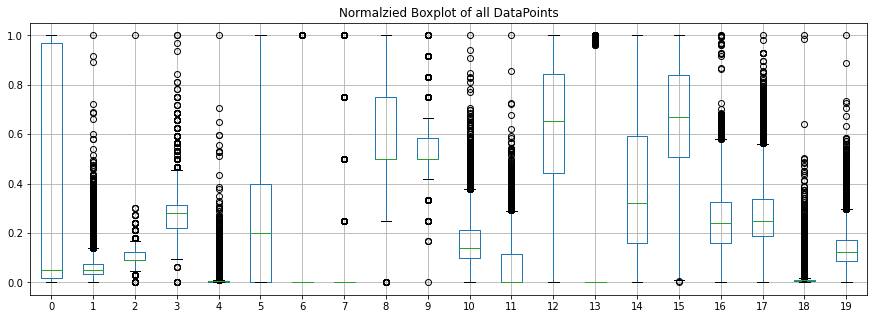

In [24]:
normalized_df.boxplot(figsize =(15,5))
plt.title('Normalzied Boxplot of all DataPoints')

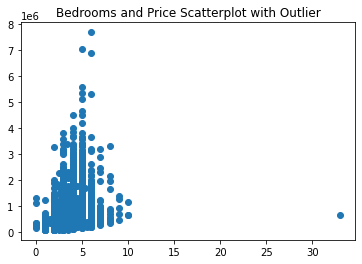

In [25]:
# Scatterplots to view data and potential outliers
y = housing_data["price"]
x = housing_data["bedrooms"]

plt.scatter(x,y)
plt.title('Bedrooms and Price Scatterplot with Outlier')
plt.show()

In [26]:
# the 33 bedroom is a clear outlier and needs to be removed 
housing_data = housing_data[housing_data['bedrooms'] < 30]

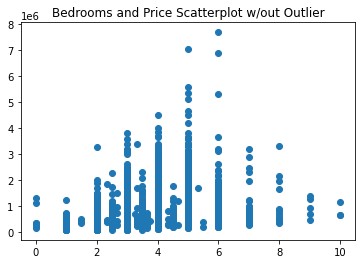

In [27]:
# view scatterplot with 33 bedroom outlier removed 
y = housing_data["price"]
x = housing_data["bedrooms"]

plt.scatter(x,y)
plt.title('Bedrooms and Price Scatterplot w/out Outlier')
plt.show()

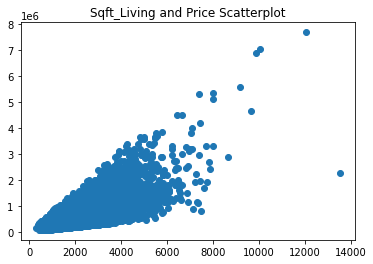

In [28]:
# Scatterplots to view data and potential outliers
y = housing_data["price"]
x = housing_data["sqft_living_calc"]

plt.scatter(x,y)
plt.title('Sqft_Living and Price Scatterplot')
plt.show()

In [29]:
# Remove all homes that have a squarfoot living calc of more than 8000
housing_data = housing_data[housing_data['sqft_living_calc'] < 8000]

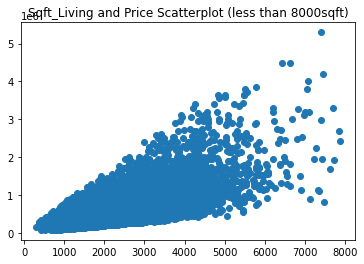

In [30]:
# Scatterplots to view data and potential outliers
y = housing_data["price"]
x = housing_data["sqft_living_calc"]

plt.scatter(x,y)
plt.title('Sqft_Living and Price Scatterplot (less than 8000sqft)')
plt.show()

Text(0.5, 1.0, 'Scatterplot of Sqft Living Space with Regression Line')

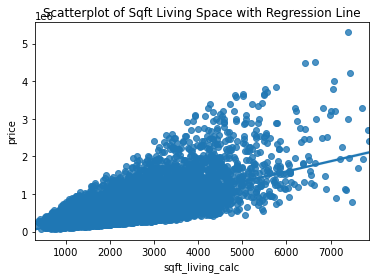

In [31]:
sns.regplot(x='sqft_living_calc', y='price',data=housing_data)
plt.title("Scatterplot of Sqft Living Space with Regression Line")

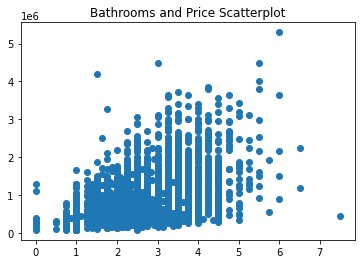

In [32]:
# Scatterplots to view data and potential outliers
y = housing_data["price"]
x = housing_data["bathrooms"]

plt.scatter(x,y)
plt.title('Bathrooms and Price Scatterplot')
plt.show()

Text(0.5, 1.0, 'Scatterplot of Sqft Living Space with Regression Line')

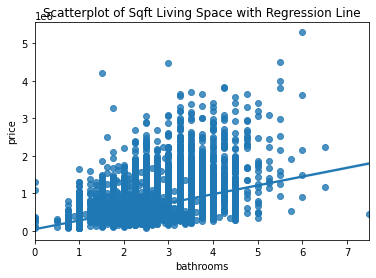

In [33]:
sns.regplot(x='bathrooms', y='price',data=housing_data)
plt.title("Scatterplot of Sqft Living Space with Regression Line")

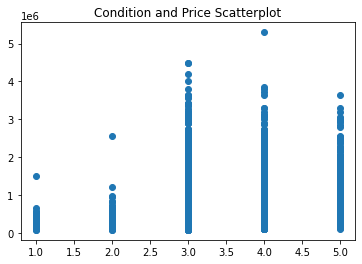

In [34]:
# Scatterplots to view data and potential outliers
y = housing_data["price"]
x = housing_data["condition"]

plt.scatter(x,y)
plt.title('Condition and Price Scatterplot')
plt.show()

Text(0.5, 0, 'Lattitude Location')

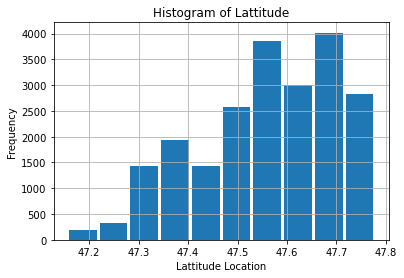

In [35]:
# Scatterplots to view data and potential outliers
%matplotlib inline

size, scale = 10, 10
housing_data['lat'].plot.hist(grid=True, bins=10, rwidth=0.9)

plt.title("Histogram of Lattitude")
plt.xlabel("Lattitude Location")

Text(0.5, 0, 'Longitute Location')

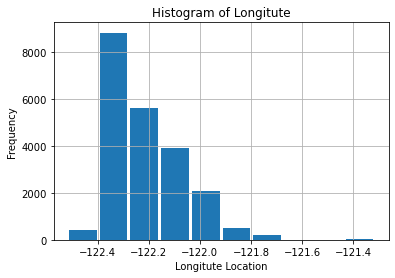

In [36]:
# Scatterplots to view data and potential outliers
%matplotlib inline

size, scale = 10, 10
housing_data['long'].plot.hist(grid=True, bins=10, rwidth=0.9)

plt.title("Histogram of Longitute")
plt.xlabel("Longitute Location")

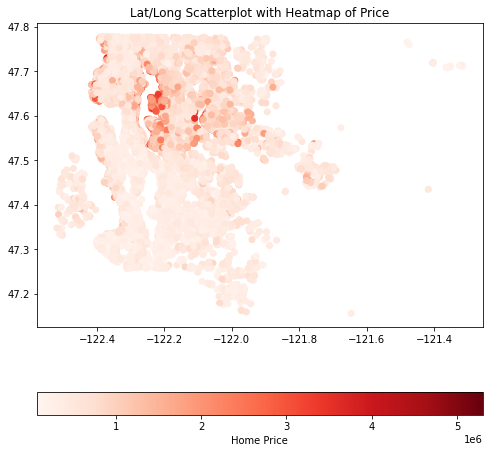

In [37]:
# create a scatterplot with lat and long and include price as a third variable
x1 = housing_data["long"]
y1 = housing_data["lat"]
colors = housing_data['price']
fig = plt.figure(figsize=(8,8))
plt.scatter(x1,y1,
           c = colors, cmap="Reds")
plt.colorbar(orientation = 'horizontal', label = 'Home Price')
plt.title("Lat/Long Scatterplot with Heatmap of Price")
plt.show()

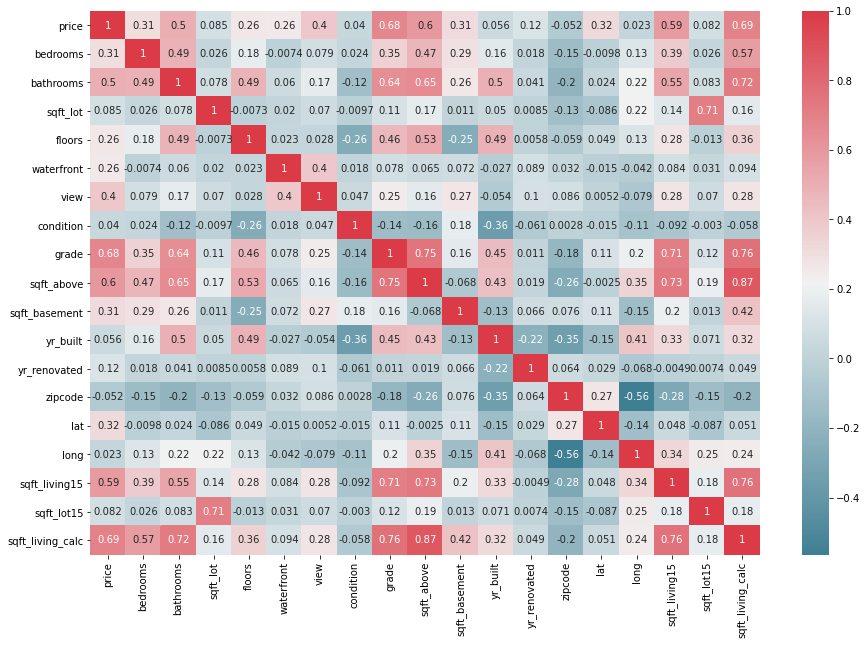

In [38]:
# create a correlation matrix to assess potential values for a regression model 
def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(housing_data.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(housing_data)

In [39]:
class color:
   BOLD = '\033[1m'  
   END = '\033[0m'

print(color.BOLD +'Summary statistics for prices for all houses:' + color.END)
print('Mean:' , round(housing_data.price.mean(),2))
print('Median: ', round(housing_data.price.median(),2))
print('Standard deviation: ', round(housing_data.price.std(),2))

print(color.BOLD + '\nSummary statistics for prices listed with waterfront:' + color.END)
waterfront_prop = housing_data[housing_data.waterfront == 1]
print('Mean: ', round(waterfront_prop.price.mean(),2))
print('Median: ', round(waterfront_prop.price.median(),2))
print('Standard deviation: ', round(waterfront_prop.price.std(),2))

print(color.BOLD + '\nSummary statistics for prices listed with no waterfront:' + color.END)
non_waterfront_prop = housing_data[housing_data.waterfront==0]
print('Mean: ', round(non_waterfront_prop.price.mean(),2))
print('Median: ', round(non_waterfront_prop.price.median(),2))
print('Standard deviation:', round(non_waterfront_prop.price.std(),2))

Summary statistics for prices for all houses:
Mean: 537981.24
Median:  450000.0
Standard deviation:  351985.08

Summary statistics for prices listed with waterfront:
Mean:  1587778.07
Median:  1372450.0
Standard deviation:  978931.0

Summary statistics for prices listed with no waterfront:
Mean:  530147.66
Median:  450000.0
Standard deviation: 330796.17


#### 3. Data Analytics 

In [40]:
#create a subset of data used to predict price with linear regression 
regression_subset = ['price','bedrooms','bathrooms','sqft_living_calc','sqft_lot','condition']
reg_df = housing_data[regression_subset]
reg_df.head(10)

,price,bedrooms,bathrooms,sqft_living_calc,sqft_lot,condition
0,221900.0,3.0,1.00,1180,5650.0,3
1,538000.0,3.0,2.25,2570,7242.0,3
2,180000.0,2.0,1.00,770,10000.0,3
3,604000.0,4.0,3.00,1960,5000.0,5
4,510000.0,3.0,2.00,1680,8080.0,3
5,1225000.0,4.0,4.50,5420,101930.0,3
6,257500.0,3.0,2.25,1715,6819.0,3
7,291850.0,3.0,1.50,1060,9711.0,3
8,229500.0,3.0,1.00,1780,7470.0,3
9,323000.0,3.0,2.50,1890,6560.0,3


In [41]:
# Linear Regression Model for Homeprices with outliers
X = reg_df[['bedrooms','bathrooms','sqft_living_calc','condition']]
Y = reg_df['price']
X = sm.add_constant(X)

model = sm.OLS(Y,X.assign(const=1)).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     5461.
Date:                Sun, 15 Aug 2021   Prob (F-statistic):               0.00
Time:                        08:27:07   Log-Likelihood:            -2.9899e+05
No. Observations:               21602   AIC:                         5.980e+05
Df Residuals:                   21597   BIC:                         5.980e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -8.865e+04   1.14e+04     -7.745      0.000   -1.11e+05   -6.62e+04
bedrooms         -5.747e+04   2331.043    -24.653      0.000    -6.2e+04   -5.29e+04
bathrooms         1.828e+04   3293.652      5.550      0.000    1.18e+04    2.47e+04
sqft_living_calc   294.3250      2.904    101.363      0.000     288.634     300.016
condition         5.003e+04   2628.279     19.037      0.000    4.49e+04    5.52e+04
==============================================================================
Omnibus:                    11875.165   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           194653.749
Skew:                           2.289   Prob(JB):                         0.00
Kurtosis:                      16.975   Cond. No.                     1.57e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
#house_lm
#remove the bedroom variable as it is statistically insignificant 
predictors = ['bedrooms','bathrooms','sqft_living_calc','sqft_lot','condition']
outcome = 'price'

house_lm = LinearRegression()
house_lm.fit(reg_df[predictors], reg_df[outcome])

for name, coef in zip(predictors, house_lm.coef_):
    print(f' {name}: {coef}')

 bedrooms: -58822.62749093407
 bathrooms: 17086.874050048908
 sqft_living_calc: 298.1690151934472
 sqft_lot: -0.32226118814105575
 condition: 50021.708995638895


In [43]:
housing_data.head()

,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_living_calc
0,201410,221900.0,3.0,1.00,5650.0,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1180
1,201412,538000.0,3.0,2.25,7242.0,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2570
2,201502,180000.0,2.0,1.00,10000.0,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,770
3,201412,604000.0,4.0,3.00,5000.0,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1960
4,201502,510000.0,3.0,2.00,8080.0,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1680


In [44]:
#create a function to create a new column for analysis
def value_assign(x):
    if 0 < x <= 100000:
        return 'Below 100K'
    elif 100000 < x <= 200000:
        return '100K to 200K'
    elif 200001 < x <= 300000:
        return '200K to 300K'
    elif 300001 < x <= 400000:
        return '300K to 400K'
    elif 400001 < x <= 600000:
        return '400K to 600K'
    elif 600001 < x <= 800000:
        return '600K to 800K'
    elif 800001 < x <= 1000000:
        return '800K to 1MM'
    elif 1000001 < x <= 1500000:
        return '1MM to 1 and half MM'
    elif 1500001< x <= 2000000:
        return '1 and half MM to 2MM'
    return 'Over 2MM'

housing_data['price_range'] = housing_data['price'].apply(value_assign)

In [52]:
#split data set, and train data to calculate accuracy 
X = housing_data.drop(columns=['price_range','price'])
y = housing_data['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7) 

model = DecisionTreeClassifier()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

score = accuracy_score(y_test, predictions)
print("The model accuracy is:", round(score,4)*100,'%')

The model accuracy is: 52.62 %
